**Mountar google-drive för att lagra dataseten där samt låta alla weights-filer vid inträning lagras dit. På så sätt blir vi int av med alla intränade modeller och dataset när colab-instansen reset:as**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Har skapat (i google drive) en katalog som heter datorseende. Går in i den katalogen med %cd**

In [5]:
%cd /content/drive/MyDrive/datorseende

/content/drive/MyDrive/datorseende


#Install Dependencies. (Detta bör göras varje gång även om du använder google-drive)

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# Download YOLOv7 repository and install requirements
# !git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

# Ladda ner zip-filen för dataseten manuellt till google drive (i detta fall till katalogen datorseende. Sedan packar vi upp zip-filen här. BEHVÖVER BARA GÖRAS 1 GÅNG!


In [ ]:
%cd /content/drive/MyDrive/datorseende
!unzip robotadultkids.zip

/content/drive/MyDrive/datorseende
Archive:  robotadultkids.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/-display-at-the-the-big-bang-fair-at-the-birmingham-nec-in-march-2018-MGX6NN_jpg.rf.f8a9d13c8149210b3565eff4c10880fb.jpg  
 extracting: test/images/-lyon-france-on-march-23-2011-photos-by-vincent-dargentabacapresscom-2E1FK3G_jpg.rf.8bdeac0e16c7217896adb6860d971826.jpg  
 extracting: test/images/10-1177_1359105313504794-fig1_jpeg.rf.e3f75b52058a92e5dc46fdd9def6d94a.jpg  
 extracting: test/images/1200px-Sauk_Indian_family_by_Frank_Rinehart_1899_jpg.rf.174563584c3e96a2c522f4c3c78fbba6.jpg  
 extracting: test/images/20140405-nO-0122b-1_jpg.rf.96e58d278cff7b7dba7fd60446a34b94.jpg  
 extracting: test/images/202107

# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

DETTA STEG BEHÖVER BARA GÖRAS 1 GÅNG EFTERSOM VI LADDAR NER ALLT TILL GOOGLE DRIVE

In [ ]:
# download COCO starting checkpoint
%cd /content/drive/MyDrive/datorseende/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
# run this cell to begin training
%cd /content/drive/MyDrive/datorseende/yolov7
!python train.py --batch 16 --epochs 50 --data /content/drive/MyDrive/datorseende/data.yaml --weights 'yolov7.pt' --device 0 --cfg cfg/training/yolov7.yaml


/content/drive/MyDrive/datorseende/yolov7
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.5625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='/content/drive/MyDrive/datorseende/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=50, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/exp9', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-13 17:47:43.672250: I tensorfl

In [ ]:
%cd /content/drive/MyDrive/datorseende/yolov7
!python train.py --batch 16 --epochs 150 --data /content/drive/MyDrive/datorseende/data.yaml --weights 'runs/train/exp9/weights/best.pt' --device 0 


/content/drive/MyDrive/datorseende/yolov7
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.5625MB)

Namespace(weights='runs/train/exp9/weights/best.pt', cfg='', data='/content/drive/MyDrive/datorseende/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=150, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/exp10', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-13 18:37:52.385642: I tensorfl

In [ ]:
!python train.py --batch 16 --epochs 300 --data /content/drive/MyDrive/datorseende/data.yaml --weights 'runs/train/exp10/weights/best.pt' --device 0 

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [ ]:
%cd /content/drive/MyDrive/datorseende/yolov7

/content/drive/MyDrive/datorseende/yolov7


In [ ]:
# Run evaluation
!python detect.py --weights runs/train/exp9/weights/best.pt --conf 0.1 --source groupImage.jpg




Namespace(weights=['runs/train/exp9/weights/best.pt'], source='groupImage.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.5625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is trac

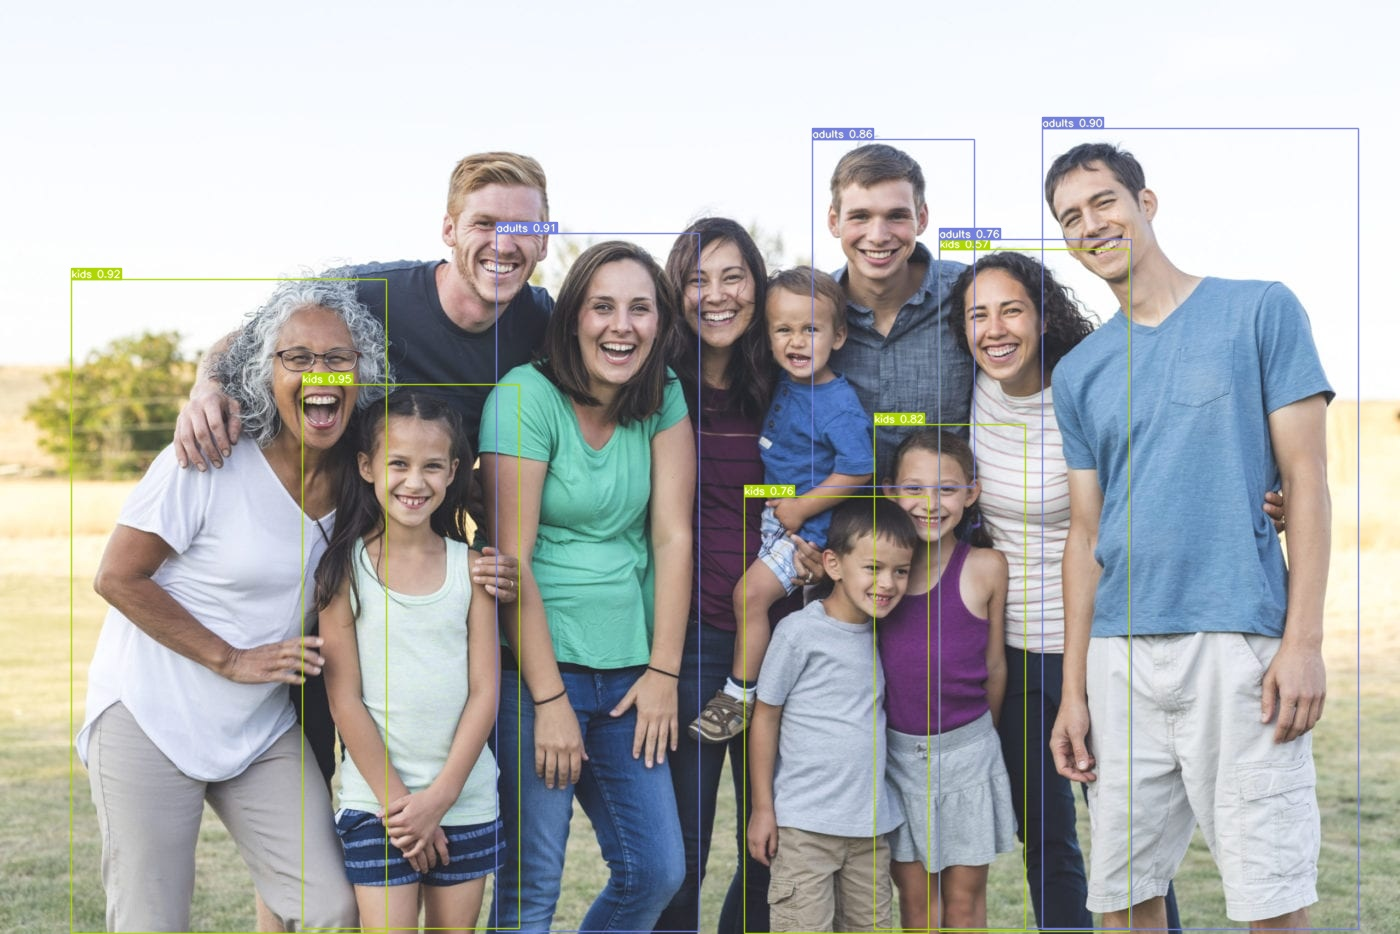

In [6]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/datorseende/yolov7/runs/detect/exp35/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# Reparameterize for Inference

https://github.com/WongKinYiu/yolov7/blob/main/tools/reparameterization.ipynb

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
# rf = Roboflow(api_key="YOUR_API_KEY")                               # used above to load data
# inference_project =  rf.workspace().project("YOUR_PROJECT_NAME")    # used above to load data
# model = inference_project.version(1).model

# upload_project = rf.workspace().project("YOUR_PROJECT_NAME")

# print("inference reference point: ", inference_project)
# print("upload destination: ", upload_project)

In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it 

# confidence_interval = [10,70]                                   # [lower_bound_percent, upper_bound_percent]

# for prediction in predictions:                                  # predictions list to loop through
#   if(prediction['confidence'] * 100 >= confidence_interval[0] and 
#           prediction['confidence'] * 100 <= confidence_interval[1]):
        
#           # upload on success!
#           print(' >> image uploaded!')
#           upload_project.upload(image, num_retry_uploads=3)     # upload image in question

# Next steps

Congratulations, you've trained a custom YOLOv7 model! Next, start thinking about deploying and [building an MLOps pipeline](https://docs.roboflow.com) so your model gets better the more data it sees in the wild.